# Visualizing Saturn's Rings and Moons

In [4]:
import numpy as np 
import pandas as pd 
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from random import random
from random import seed
from IPython.display import Image

##### We will be using the planetary_rings.csv which gives us information about each ring  such as the radii, width, opacity and dust fraction

In [6]:
df = pd.read_csv('/kaggle/input/planetary-rings-csv/planetary_rings.csv')
df.head()

,object,ring_name,ring_name_simp,min,max,width lower,width upper,od lower,od upper,df lower,df upper,notes
0,saturn,D,D,66000,74000.0,8000.0,8000.0,0.001,0.001,50.0,100.0,NaN
1,saturn,C,C,74490,91983.0,17493.0,17493.0,0.100,0.100,0.0,3.0,NaN
2,saturn,B,B,91983,117516.0,25533.0,25533.0,1.000,5.000,0.0,3.0,NaN
3,saturn,Cassini Division,CD,117516,122053.0,4537.0,4537.0,0.050,0.150,0.0,3.0,NaN
4,saturn,A,A,122053,136774.0,14721.0,14721.0,0.500,0.500,0.0,3.0,NaN


In [8]:
saturn_rings = df.loc[df['object'] == 'saturn']

names = saturn_rings['ring_name_simp'].values
inner = saturn_rings['min'].values
outer = saturn_rings['max'].values

#optical density(opacity)
od = (saturn_rings['od lower'] + saturn_rings['od upper'])/2
od = od.values
saturn_rings

,object,ring_name,ring_name_simp,min,max,width lower,width upper,od lower,od upper,df lower,df upper,notes
0,saturn,D,D,66000,74000.0,8000.0,8000.0,0.001000,0.001000,50.0,100.0,NaN
1,saturn,C,C,74490,91983.0,17493.0,17493.0,0.100000,0.100000,0.0,3.0,NaN
2,saturn,B,B,91983,117516.0,25533.0,25533.0,1.000000,5.000000,0.0,3.0,NaN
3,saturn,Cassini Division,CD,117516,122053.0,4537.0,4537.0,0.050000,0.150000,0.0,3.0,NaN
4,saturn,A,A,122053,136774.0,14721.0,14721.0,0.500000,0.500000,0.0,3.0,NaN
5,saturn,F,F,140175,140225.0,50.0,50.0,0.100000,0.500000,98.0,100.0,NaN
6,saturn,G,G,166000,173000.0,7000.0,7000.0,0.000001,0.000001,99.0,100.0,NaN
7,saturn,E,E,180000,450000.0,270000.0,270000.0,0.000010,0.000010,100.0,100.0,NaN


In [9]:
#plot the rings transparancy based off the optical density (Opacity)
alphas = []
for i in od:
    if i > 1:
        alphas.append(1)
    # minimum value for it to be visible
    elif i < 0.001:
        alphas.append(0.025)
    elif i < 0.01:
        alphas.append(i*100)
    else:
        alphas.append(i*1.8)
alphas

[0.1, 0.18000000000000002, 1, 0.18000000000000002, 0.9, 0.54, 0.025, 0.025]

(-255530.0, 255530.0, -255530.0, 255530.0)

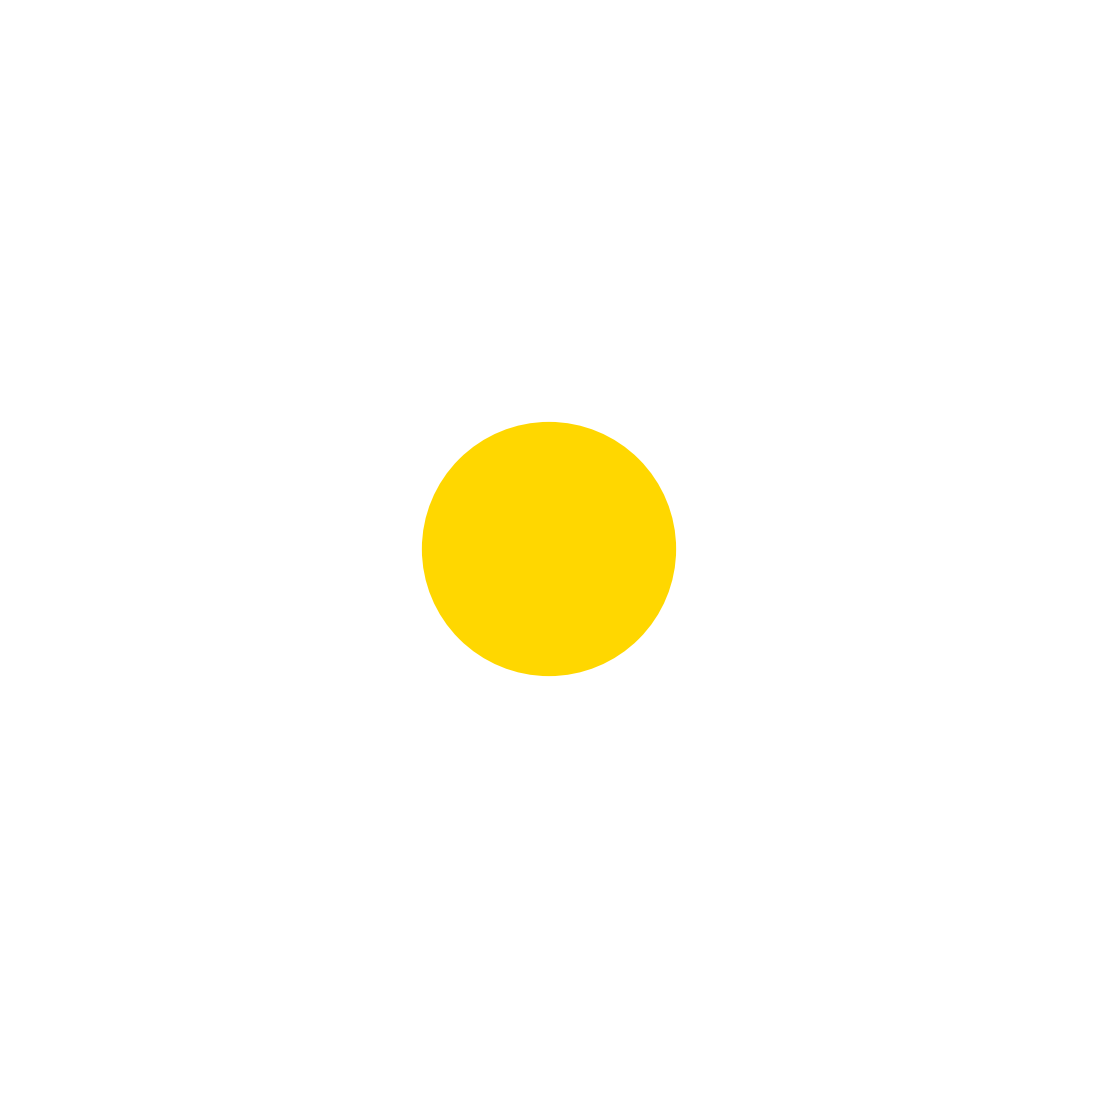

In [10]:
fig = plt.figure(num=1, figsize=(14, 14))
ax = plt.subplot(111)
ax.set_facecolor('white')

# zorder counter
z = 30

# plot the planet first, get radius of Saturn
rad = 120536/2 # km
circle = Circle((0, 0), rad, color='gold', zorder=z, alpha=1, ec='None')
ax.add_artist(circle)
z -= 1

limit = outer[-2]+80000
ax.set_xlim(-limit*1.01, limit*1.01)
ax.set_ylim(-limit*1.01, limit*1.01)
ax.set_aspect('equal')
ax.axis('off')

### Now let's add the rings:

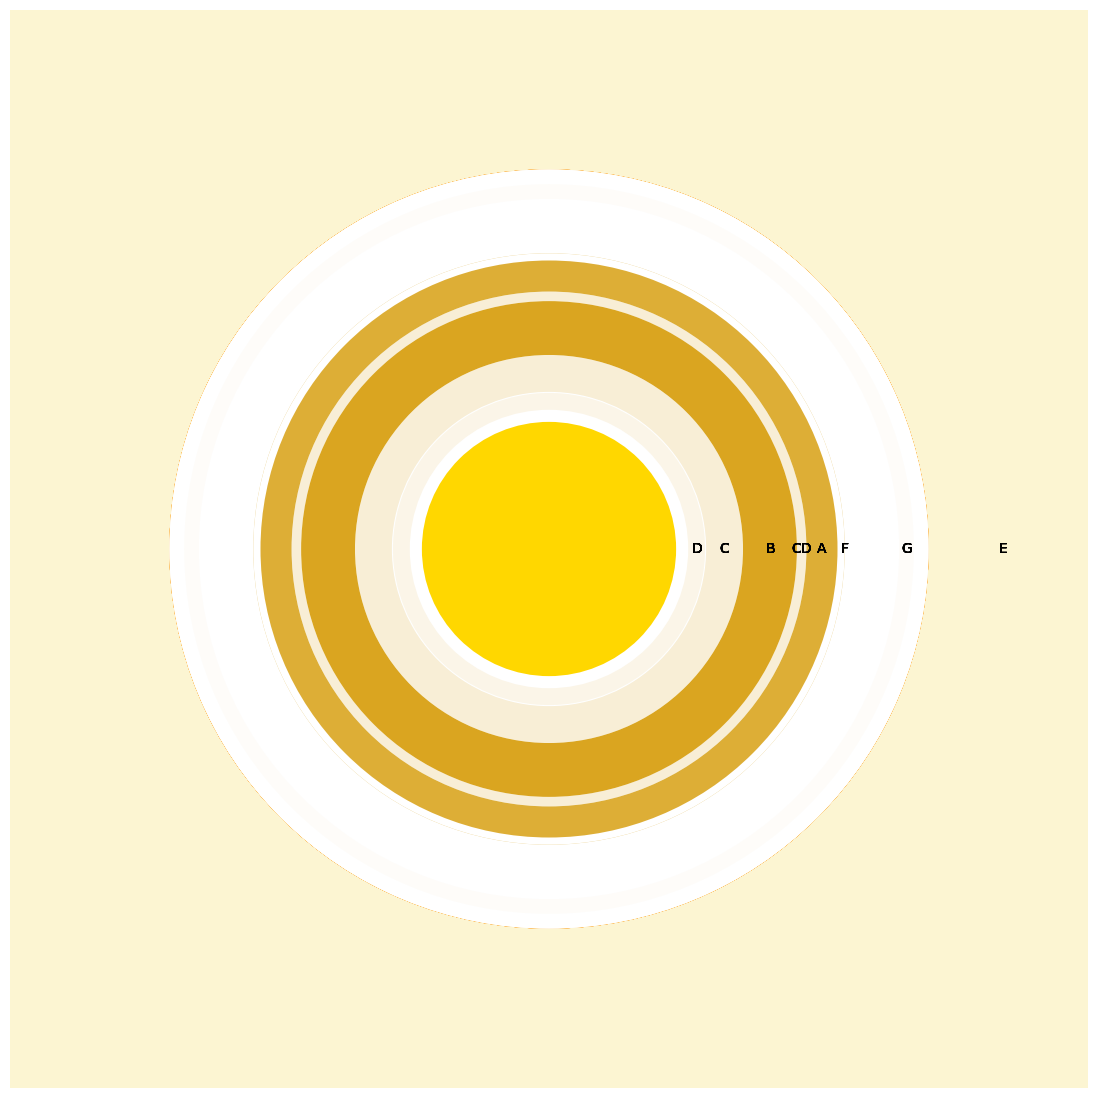

In [19]:
for i in range(len(names)):
    # add the first ring
    circle = Circle((0, 0), inner[i], color='orange', zorder=z, ec='None')
    ax.add_artist(circle)
    z -= 1
    
    # add the second ring
    circle = Circle((0, 0), outer[i], color='yellow', zorder=z, alpha=alphas[i], ec='None')
    ax.add_artist(circle)
    z -=1
    
    #name each ring 
    tx = (outer[i]-inner[i])/2 + inner[i]
    if names[i] == 'E': 
        tx = 215000
    ax.text(tx, 0, names[i], fontsize=10, color='black', zorder=32, ha='center', va='center')
    
fig

### Now let's add Saturn's Moons

we will use the saturn_moons.csv

In [21]:
moons = pd.read_csv('/kaggle/input/saturns-moons-csv/saturn_moons.csv')
moons.head()

,Name,Semimajor Axis,Period,Eccentricity,Inclination,Mean Diameter,Mass,Associated Ring,Footnotes,Comments
0,Pan,133584.0,0.575,0.00001,0.0001,28.0,495.0,"A ring, Encke gap","4,8,9",NaN
1,Daphnis,136504.0,0.594,0.00003,0.0036,7.6,7.7,"A ring, Keeler gap","3,10",NaN
2,Atlas,137666.0,0.602,0.00120,0.0030,30.2,660.0,"A ring, Roche division","8,9",NaN
3,Prometheus,139378.0,0.613,0.00220,0.0070,84.2,15900.0,"F ring, Roche division","8,9",Prometheus and Pandora interact to produce cha...
4,Pandora,141713.0,0.629,0.00420,0.0500,81.4,13700.0,F ring,"8,9",Prometheus and Pandora interact to produce cha...


In [22]:
moons = moons.loc[moons['Semimajor Axis'] <= moons.loc[moons['Name'] == 'Enceladus', 'Semimajor Axis'].iloc[0]]

moon_names = moons['Name'].values
moon_A = moons['Semimajor Axis'].values
moon_diam = moons['Mean Diameter'].values

moons

,Name,Semimajor Axis,Period,Eccentricity,Inclination,Mean Diameter,Mass,Associated Ring,Footnotes,Comments
0,Pan,133584.0,0.575,0.00001,0.0001,28.00,4.950000e+02,"A ring, Encke gap","4,8,9",NaN
1,Daphnis,136504.0,0.594,0.00003,0.0036,7.60,7.700000e+00,"A ring, Keeler gap","3,10",NaN
2,Atlas,137666.0,0.602,0.00120,0.0030,30.20,6.600000e+02,"A ring, Roche division","8,9",NaN
3,Prometheus,139378.0,0.613,0.00220,0.0070,84.20,1.590000e+04,"F ring, Roche division","8,9",Prometheus and Pandora interact to produce cha...
4,Pandora,141713.0,0.629,0.00420,0.0500,81.40,1.370000e+04,F ring,"8,9",Prometheus and Pandora interact to produce cha...
5,Epimetheus,151452.0,0.695,0.00970,0.3520,116.20,5.270000e+04,Janus/Epimetheus ring,"8,9",Janus and Epimetheus are ?coorbital? and under...
6,Janus,151452.0,0.695,0.00680,0.1640,178.00,1.900000e+05,Janus/Epimetheus ring,"8,9",Janus and Epimetheus are ?coorbital? and under...
7,Aegaeon,167494.0,0.808,0.00024,0.0010,0.66,3.500000e-08,G ring,7,Embedded in the G Ring.
8,Mimas,185537.0,0.942,0.01960,1.5650,396.00,3.750000e+06,"B ring, Cassini division, Huygens gap","5,8",NaN
9,Methone,194230.0,1.010,0.01000,0.0100,2.80,3.920000e+02,Methone ring,10,NaN


In [23]:
#Calculate the positions of the moons

def moon_pos(A):
    seed(1)
    rands = [random() for i in range(len(A))]
    rands = np.asarray(rands) * 2 * np.pi 
    x = np.multiply(A, np.cos(rands))
    y = np.multiply(A, np.sin(rands))
    return x, y

moon_x, moon_y = moon_pos(moon_A)

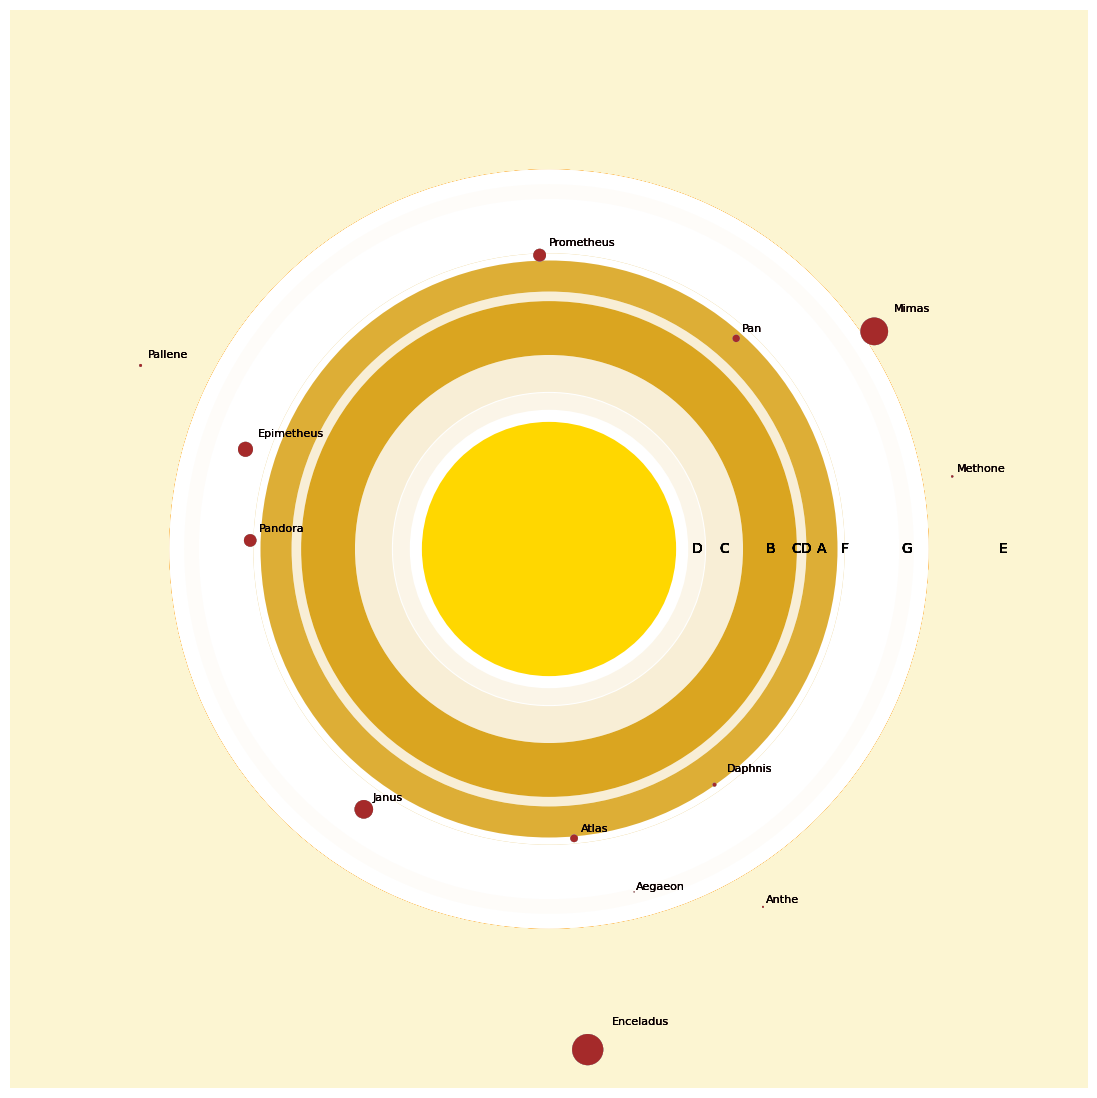

In [29]:
# Add these moons to our Saturn plot

for i in range(len(moons)):
    ax.scatter(moon_x[i], moon_y[i], ec='None', s=[moon_diam[i]], color='brown', zorder=31)
    if moon_diam[i] < 1:
        shift = moon_diam[i]*1500
    elif moon_diam[i] < 20:
        shift = moon_diam[i]*800
    elif moon_diam[i] < 50:
        shift = moon_diam[i]*100
    elif moon_diam[i] < 120:
        shift = moon_diam[i]*50
    else:
        shift = moon_diam[i]*23
    textx = moon_x[i]+shift
    texty = moon_y[i]+shift
    ax.text(textx, texty, moon_names[i], fontsize=8, color='black', zorder=31)
    
fig

### Calculating the Roche Limit
The minimum distance a moon can approach it's parent planet without having the tidal forces overcome the internal gravity holding the moon together

**d = 2.44R(p_M/p_m)^1/3**

**R ** is the radius of the parent planet

**M** = parent body

**m** = child moon

Pan: 171824.3 km
Daphnis: 186829.3 km
Atlas: 168378.8 km
Prometheus: 162545.4 km
Pandora: 165137.6 km
Epimetheus: 150451.9 km
Janus: 150301.7 km
Aegaeon: 9794516.0 km
Mimas: 123731.4 km
Methone: 18572.0 km
Anthe: 182723.6 km
Pallene: 20386.8 km
Enceladus: 110683.9 km


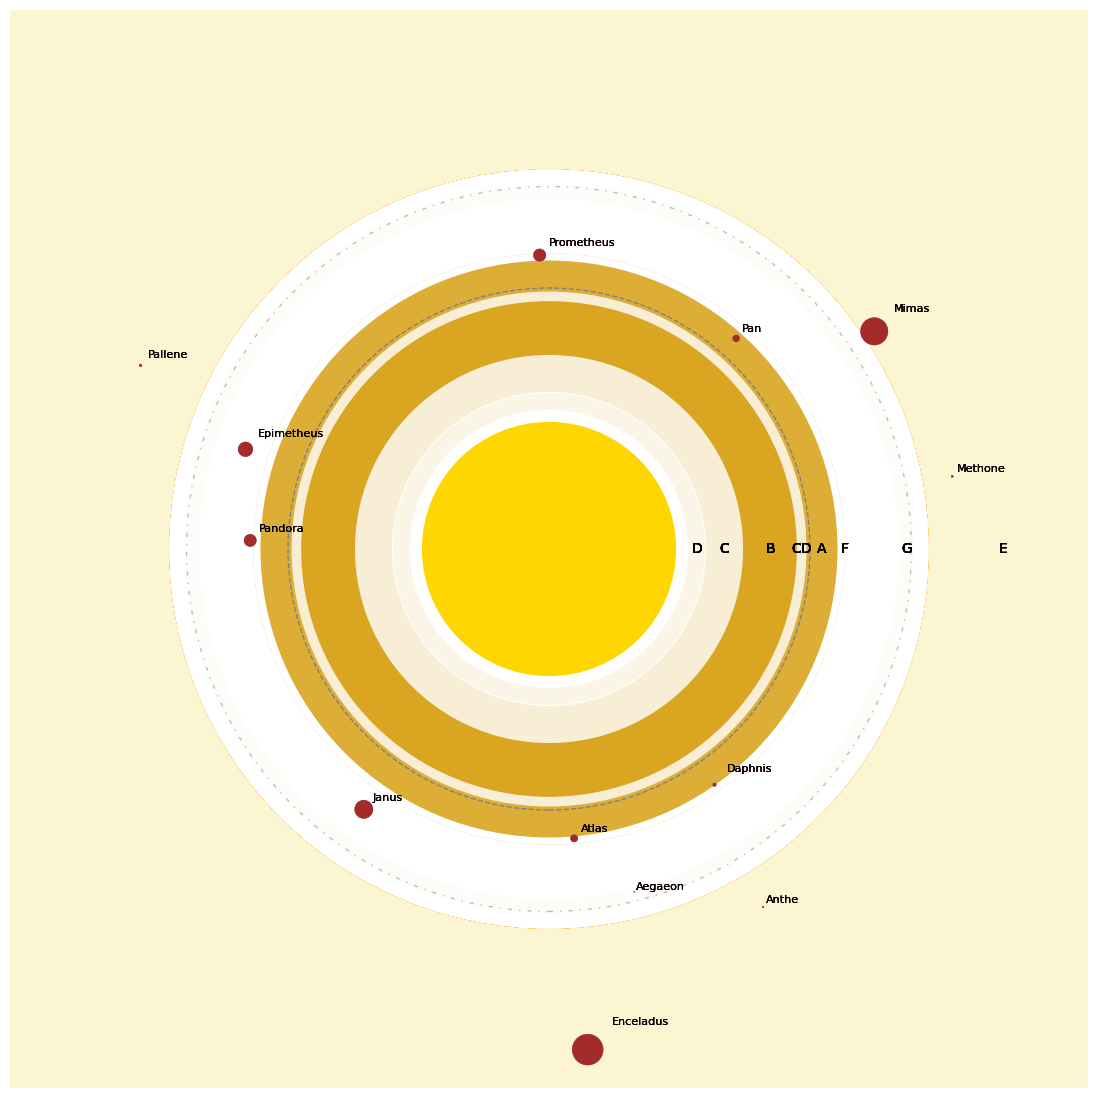

In [31]:
# Calculate Roche limit of various moons then plot the limit 
# as a dashed line around Saturn to visualize it

moons['Density'] = moons['Mass']*10**13/(4/3*np.pi*(moons['Mean Diameter']/2*1000)**3)
moon_dens = moons['Density'].values # kg/m^3
density = 687 # kg/m^3

roche = 2.44*rad*(density/moon_dens)**(1/3)
for m, r in zip(moon_names, roche):
    print(m+': {:.1f} km'.format(r))

# Pan
circle = Circle((0, 0), roche[0], ls=(0, (3, 5, 1, 5)), color='gray', zorder=30, fc='None', alpha=.5)
ax.add_artist(circle)
# Mimas
circle = Circle((0, 0), roche[-5], ls='--', color='gray', zorder=30, fc='None')
ax.add_artist(circle)

fig